In [1]:
import pandas as pd

import seaborn as sns

sns.set_context("talk")
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.formula.api as smf
import numpy as np
plt.style.use("ggplot")

In [2]:
data=pd.read_csv('clean_data/final_dataset.csv')

In [3]:
data[['income_census','pop_census']]=np.log(data[['income_census','pop_census']])

In [4]:
data=data.query('nhwrate>0.7 and nativerate<0.025').reset_index(drop=True)

# OLS

## Mormon-> bad outcomes

In [5]:
smf.ols('pov_saipe_2010~mormon',data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.056
Date:                Sun, 23 Dec 2018   Prob (F-statistic):             0.0806
Time:                        18:54:53   Log-Likelihood:                 3320.5
No. Observations:                2083   AIC:                            -6637.
Df Residuals:                    2081   BIC:                            -6626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1507      0.001    136.114      0.000       0.148       0.153
mormon     -1.958e-05   1.12e-05     -1.748      0.081   -4.15e-05    2.38e-06
==============================================================================
Omnibus:                      191.921   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.052
Skew:                           0.702   Prob(JB):                     1.26e-62
Kurtosis:                       4.147   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
## Controls for income and race
smf.ols('povrate~(pop_census)*mormon+state_mormon',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.904
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           6.16e-08
Time:                        18:54:53   Log-Likelihood:                 3245.2
No. Observations:                2083   AIC:                            -6480.
Df Residuals:                    2078   BIC:                            -6452.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1859      0.009     20.969      0.000       0.168       0.203
pop_census           -0.0046      0.001     -5.273      0.000      -0.006      -0.003
mormon            -7.669e-05   7.58e-05     -1.012      0.312      -0.000     7.2e-05
pop_census:mormon  1.272e-05   7.66e-06      1.661      0.097    -2.3e-06    2.77e-05
state_mormon         -0.1016      0.032     -3.179      0.001      -0.164      -0.039
==============================================================================
Omnibus:                      257.835   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.672
Skew:                           0.816   Prob(JB):                     8.33e-99
Kurtosis:                       4.595   Cond. No.                     2.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
## Fixed effects
smf.ols('povrate~state',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     20.47
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          4.13e-139
Time:                        18:54:53   Log-Likelihood:                 3636.0
No. Observations:                2083   AIC:                            -7174.
Df Residuals:                    2034   BIC:                            -6898.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1654      0.007     22.560      0.000       0.151       0.180
state[T.Alaska]            -0.0569      0.043     -1.313      0.189      -0.142       0.028
state[T.Arizona]           -0.0162      0.031     -0.522      0.602      -0.077       0.045
state[T.Arkansas]           0.0155      0.009      1.641      0.101      -0.003       0.034
state[T.California]        -0.0426      0.013     -3.219      0.001      -0.069      -0.017
state[T.Colorado]          -0.0638      0.010     -6.508      0.000      -0.083      -0.045
state[T.Connecticut]       -0.0914      0.020     -4.463      0.000      -0.132      -0.051
state[T.Delaware]          -0.0485      0.043     -1.119      0.263      -0.134       0.037
state[T.Florida]           -0.0176      0.010     -1.798      0.072      -0.037       0.002
state[T.Georgia]           -0.0102      0.009     -1.101      0.271      -0.028       0.008
state[T.Idaho]             -0.0212      0.011     -2.000      0.046      -0.042      -0.000
state[T.Illinois]          -0.0364      0.009     -4.252      0.000      -0.053      -0.020
state[T.Indiana]           -0.0406      0.009     -4.694      0.000      -0.058      -0.024
state[T.Iowa]              -0.0547      0.009     -6.427      0.000      -0.071      -0.038
state[T.Kansas]            -0.0440      0.009     -5.102      0.000      -0.061      -0.027
state[T.Kentucky]           0.0401      0.008      4.822      0.000       0.024       0.056
state[T.Louisiana]         -0.0099      0.013     -0.751      0.453      -0.036       0.016
state[T.Maine]             -0.0331      0.013     -2.495      0.013      -0.059      -0.007
state[T.Maryland]          -0.0825      0.013     -6.224      0.000      -0.108      -0.056
state[T.Massachusetts]     -0.0743      0.014     -5.174      0.000      -0.102      -0.046
state[T.Michigan]          -0.0164      0.009     -1.844      0.065      -0.034       0.001
state[T.Minnesota]         -0.0614      0.009     -6.918      0.000      -0.079      -0.044
state[T.Mississippi]        0.0141      0.012      1.168      0.243      -0.010       0.038
state[T.Missouri]          -0.0049      0.008     -0.585      0.558      -0.021       0.012
state[T.Montana]           -0.0287      0.010     -2.803      0.005      -0.049      -0.009
state[T.Nebraska]          -0.0509      0.009     -5.857      0.000      -0.068      -0.034
state[T.Nevada]            -0.0470      0.020     -2.298      0.022      -0.087      -0.007
state[T.New Hampshire]     -0.0739      0.015     -4.804      0.000      -0.104      -0.044
state[T.New Jersey]        -0.0986      0.015     -6.411      0.000      -0.129      -0.068
state[T.New Mexico]        -0.0408      0.031     -1.314      0.189      -0.102       0.020
state[T.New York]          -0.0389      0.009  

In [8]:
## Fixed effects
model=smf.ols('povrate~pop_census*mormon+state+state_mormon',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     21.33
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          9.37e-152
Time:                        18:54:53   Log-Likelihood:                 3672.2
No. Observations:                2083   AIC:                            -7240.
Df Residuals:                    2031   BIC:                            -6947.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2460      0.012     20.478      0.000       0.222       0.270
state[T.Alaska]            -0.0813      0.043     -1.903      0.057      -0.165       0.002
state[T.Arizona]           -0.0052      0.030     -0.170      0.865      -0.065       0.055
state[T.Arkansas]           0.0108      0.009      1.160      0.246      -0.007       0.029
state[T.California]        -0.0406      0.013     -3.121      0.002      -0.066      -0.015
state[T.Colorado]          -0.0729      0.010     -7.579      0.000      -0.092      -0.054
state[T.Connecticut]       -0.0822      0.020     -4.076      0.000      -0.122      -0.043
state[T.Delaware]          -0.0382      0.043     -0.895      0.371      -0.122       0.045
state[T.Florida]           -0.0145      0.010     -1.505      0.133      -0.033       0.004
state[T.Georgia]           -0.0135      0.009     -1.483      0.138      -0.031       0.004
state[T.Idaho]             -0.0234      0.011     -2.205      0.028      -0.044      -0.003
state[T.Illinois]          -0.0406      0.008     -4.805      0.000      -0.057      -0.024
state[T.Indiana]           -0.0427      0.009     -5.018      0.000      -0.059      -0.026
state[T.Iowa]              -0.0618      0.008     -7.357      0.000      -0.078      -0.045
state[T.Kansas]            -0.0560      0.009     -6.527      0.000      -0.073      -0.039
state[T.Kentucky]           0.0339      0.008      4.129      0.000       0.018       0.050
state[T.Louisiana]         -0.0117      0.013     -0.900      0.368      -0.037       0.014
state[T.Maine]             -0.0311      0.013     -2.383      0.017      -0.057      -0.006
state[T.Maryland]          -0.0784      0.013     -6.010      0.000      -0.104      -0.053
state[T.Massachusetts]     -0.0635      0.014     -4.474      0.000      -0.091      -0.036
state[T.Michigan]          -0.0162      0.009     -1.856      0.064      -0.033       0.001
state[T.Minnesota]         -0.0660      0.009     -7.544      0.000      -0.083      -0.049
state[T.Mississippi]        0.0109      0.012      0.919      0.358      -0.012       0.034
state[T.Missouri]          -0.0112      0.008     -1.362      0.173      -0.027       0.005
state[T.Montana]           -0.0423      0.010     -4.213      0.000      -0.062      -0.023
state[T.Nebraska]          -0.0663      0.009     -7.609      0.000      -0.083      -0.049
state[T.Nevada]            -0.0493      0.020     -2.467      0.014      -0.088      -0.010
state[T.New Hampshire]     -0.0690      0.015     -4.562      0.000      -0.099      -0.039
state[T.New Jersey]        -0.0872      0.015     -5.743      0.000      -0.117      -0.057
state[T.New Mexico]        -0.0491      0.031     -1.608      0.108      -0.109       0.011
state[T.New York]          -0.0348      0.009  

Text(0, 0.5, 'Predicted poverty rate')

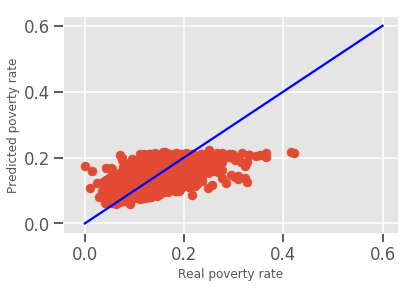

In [9]:
## How good is this?
plt.scatter(data.povrate,model.predict(data))
plt.plot([0,0.6],[0,0.6],color='blue')
plt.xlabel('Real poverty rate')
plt.ylabel('Predicted poverty rate')

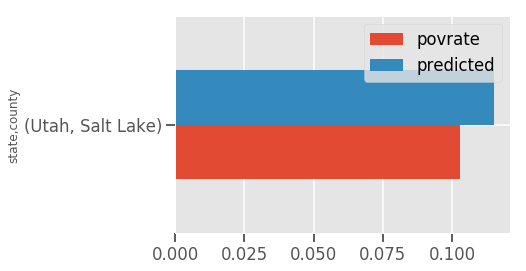

In [10]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["povrate", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [11]:
## Same on saipe
model=smf.ols('pov_saipe_2010~(pop_census)*mormon+state+state_mormon',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     25.99
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          7.42e-183
Time:                        18:54:54   Log-Likelihood:                 3842.3
No. Observations:                2083   AIC:                            -7581.
Df Residuals:                    2031   BIC:                            -7287.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2745      0.011     24.795      0.000       0.253       0.296
state[T.Alaska]            -0.1723      0.039     -4.376      0.000      -0.250      -0.095
state[T.Arizona]            0.0076      0.028      0.269      0.788      -0.048       0.063
state[T.Arkansas]          -0.0061      0.009     -0.711      0.477      -0.023       0.011
state[T.California]        -0.0410      0.012     -3.427      0.001      -0.065      -0.018
state[T.Colorado]          -0.0815      0.009     -9.191      0.000      -0.099      -0.064
state[T.Connecticut]       -0.0989      0.019     -5.322      0.000      -0.135      -0.062
state[T.Delaware]          -0.0399      0.039     -1.015      0.310      -0.117       0.037
state[T.Florida]           -0.0097      0.009     -1.088      0.277      -0.027       0.008
state[T.Georgia]           -0.0266      0.008     -3.169      0.002      -0.043      -0.010
state[T.Idaho]             -0.0298      0.010     -3.051      0.002      -0.049      -0.011
state[T.Illinois]          -0.0607      0.008     -7.804      0.000      -0.076      -0.045
state[T.Indiana]           -0.0546      0.008     -6.956      0.000      -0.070      -0.039
state[T.Iowa]              -0.0757      0.008     -9.776      0.000      -0.091      -0.061
state[T.Kansas]            -0.0722      0.008     -9.139      0.000      -0.088      -0.057
state[T.Kentucky]           0.0152      0.008      2.008      0.045       0.000       0.030
state[T.Louisiana]         -0.0238      0.012     -1.982      0.048      -0.047      -0.000
state[T.Maine]             -0.0481      0.012     -4.005      0.000      -0.072      -0.025
state[T.Maryland]          -0.0873      0.012     -7.270      0.000      -0.111      -0.064
state[T.Massachusetts]     -0.0778      0.013     -5.948      0.000      -0.103      -0.052
state[T.Michigan]          -0.0250      0.008     -3.101      0.002      -0.041      -0.009
state[T.Minnesota]         -0.0876      0.008    -10.853      0.000      -0.103      -0.072
state[T.Mississippi]       -0.0028      0.011     -0.257      0.797      -0.024       0.019
state[T.Missouri]          -0.0223      0.008     -2.930      0.003      -0.037      -0.007
state[T.Montana]           -0.0505      0.009     -5.463      0.000      -0.069      -0.032
state[T.Nebraska]          -0.0809      0.008    -10.064      0.000      -0.097      -0.065
state[T.Nevada]            -0.0650      0.018     -3.529      0.000      -0.101      -0.029
state[T.New Hampshire]     -0.0825      0.014     -5.918      0.000      -0.110      -0.055
state[T.New Jersey]        -0.1022      0.014     -7.297      0.000      -0.130      -0.075
state[T.New Mexico]        -0.0758      0.028     -2.692      0.007      -0.131      -0.021
state[T.New York]          -0.0495      0.009  

In [12]:
## Same on saipe, no FE
model=smf.ols('pov_saipe_2010~+(pop_census)*mormon+state_mormon',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.329
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           7.38e-06
Time:                        18:54:54   Log-Likelihood:                 3333.6
No. Observations:                2083   AIC:                            -6657.
Df Residuals:                    2078   BIC:                            -6629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1910      0.008     22.477      0.000       0.174       0.208
pop_census           -0.0039      0.001     -4.745      0.000      -0.006      -0.002
mormon            -8.013e-05   7.27e-05     -1.103      0.270      -0.000    6.24e-05
pop_census:mormon  1.152e-05   7.34e-06      1.570      0.117   -2.87e-06    2.59e-05
state_mormon         -0.0731      0.031     -2.386      0.017      -0.133      -0.013
==============================================================================
Omnibus:                      178.783   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.297
Skew:                           0.688   Prob(JB):                     2.70e-55
Kurtosis:                       4.002   Cond. No.                     2.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

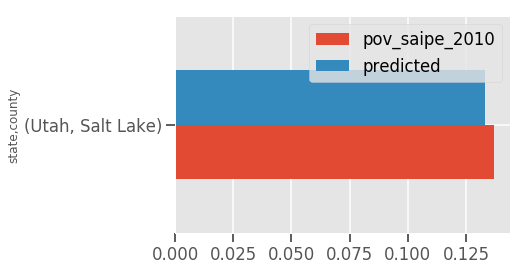

In [13]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["pov_saipe_2010", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [14]:
#Does adding all the other religions help?
## Same on saipe
model=smf.ols('pov_saipe_2010~(pop_census)*mormon'
              '+state+state_mormon+b_protes+catholic+e_protes+m_protes+'
              'south_baptist+o_jew+muslim',data=data).fit()
model.summary()
#A bit, Loglikelihood,R2 went up, BIC is a bit petter

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     28.53
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          3.35e-218
Time:                        18:54:54   Log-Likelihood:                 3941.3
No. Observations:                2083   AIC:                            -7765.
Df Residuals:                    2024   BIC:                            -7432.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2836      0.012     22.860      0.000       0.259       0.308
state[T.Alaska]            -0.1526      0.038     -4.026      0.000      -0.227      -0.078
state[T.Arizona]            0.0212      0.027      0.784      0.433      -0.032       0.074
state[T.Arkansas]          -0.0033      0.008     -0.396      0.692      -0.020       0.013
state[T.California]        -0.0198      0.012     -1.623      0.105      -0.044       0.004
state[T.Colorado]          -0.0629      0.009     -6.758      0.000      -0.081      -0.045
state[T.Connecticut]       -0.0600      0.018     -3.275      0.001      -0.096      -0.024
state[T.Delaware]          -0.0145      0.038     -0.383      0.702      -0.089       0.060
state[T.Florida]           -0.0020      0.009     -0.230      0.818      -0.019       0.015
state[T.Georgia]           -0.0231      0.008     -2.846      0.004      -0.039      -0.007
state[T.Idaho]             -0.0175      0.010     -1.772      0.076      -0.037       0.002
state[T.Illinois]          -0.0371      0.008     -4.500      0.000      -0.053      -0.021
state[T.Indiana]           -0.0328      0.008     -3.879      0.000      -0.049      -0.016
state[T.Iowa]              -0.0313      0.009     -3.546      0.000      -0.049      -0.014
state[T.Kansas]            -0.0370      0.009     -4.258      0.000      -0.054      -0.020
state[T.Kentucky]           0.0236      0.007      3.184      0.001       0.009       0.038
state[T.Louisiana]         -0.0061      0.012     -0.520      0.603      -0.029       0.017
state[T.Maine]             -0.0256      0.012     -2.093      0.037      -0.050      -0.002
state[T.Maryland]          -0.0599      0.012     -4.954      0.000      -0.084      -0.036
state[T.Massachusetts]     -0.0333      0.013     -2.477      0.013      -0.060      -0.007
state[T.Michigan]          -0.0022      0.009     -0.258      0.797      -0.019       0.015
state[T.Minnesota]         -0.0363      0.009     -3.928      0.000      -0.054      -0.018
state[T.Mississippi]        0.0003      0.010      0.032      0.974      -0.020       0.021
state[T.Missouri]          -0.0078      0.008     -1.019      0.308      -0.023       0.007
state[T.Montana]           -0.0265      0.010     -2.704      0.007      -0.046      -0.007
state[T.Nebraska]          -0.0407      0.009     -4.508      0.000      -0.058      -0.023
state[T.Nevada]            -0.0533      0.018     -2.954      0.003      -0.089      -0.018
state[T.New Hampshire]     -0.0530      0.014     -3.773      0.000      -0.080      -0.025
state[T.New Jersey]        -0.0717      0.015     -4.916      0.000      -0.100      -0.043
state[T.New Mexico]        -0.0513      0.027     -1.891      0.059      -0.104       0.002
state[T.New York]          -0.0194      0.009  

## Conclusion
For fixed effects model:
* Mormon coefficient for pov_saipe_2010=-5.087e-05 (p=0.282)
* Mormon coefficient for state_mormon=-0.0002	(p=0.974)

If mormonism falls from 1000 to 0, that means 1000\*0.5e-5=0.005 increment in the poverty rate (e.g. from 0.2 to 0.2005). e.g. for Salt Lake City (baseline=0.137), that would mean an increase of 3.64% (Assuming the model is right) 

# Predicting with XGBoost
XGBoost is a library that enables one to train gradient boosted trees, which should better capture odd nonlinearities present in the data.

It has many parameters to tune, so I leave it in the bands of BayesSearchCV to find the optimal ones. It will try a combination of parameters, run a k-fold CV to estimate accuracy, and then make a guess about what the best combinations of parameters is, up to n times.

In [15]:
import xgboost as xgb

X_plain = data[
    [
        "state",
        "mormon",
        "pop_census",
        "state_mormon",
        "b_protes",
        "catholic",
        "e_protes",
        "m_protes",
        "south_baptist",
        "o_jew",
        "muslim",
    ]
]
y = data.pov_saipe_2010
st_dummie = pd.get_dummies(data.state)
X = pd.concat([X_plain.drop(columns="state"), st_dummie], axis=1)

In [16]:
# https://www.kaggle.com/nikitpatel/random-grid-bayes-search-cv-for-xgb
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

ITERATIONS = 40


def get_bayes_tuner(estimator, search_space):
    return BayesSearchCV(
        estimator=estimator,
        search_spaces=search_space,
        cv=KFold(n_splits=20, shuffle=True, random_state=42),
        n_jobs=6,
        n_iter=ITERATIONS,
        verbose=0,
        refit=True,
        random_state=42,
    )

In [17]:
result = get_bayes_tuner(xgb.XGBRegressor(n_jobs=2, silent=1),{
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 12),       
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.3, 1.0, 'uniform'),
        'colsample_bylevel': (0.5, 1.0, 'uniform'),
        'n_estimators': (50, 100,120)
    }).fit(
    X, y
)

In [18]:
# True score
result.best_score_

0.4919666587485522

In [19]:
#Fake score because we are training on the whole set
result.score(X,y)

0.7706160875473651

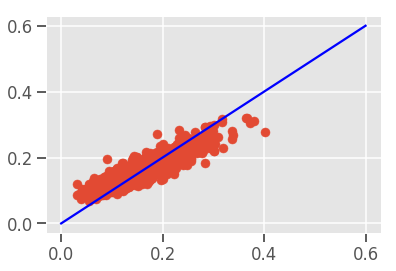

In [20]:
plt.scatter(y,result.predict(X))
plt.plot([0,0.6],[0,0.6],color='blue')

In [21]:
result.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.7491363606249059,
       colsample_bytree=0.8797129846200855, gamma=0,
       learning_rate=0.051826160697511295, max_delta_step=0, max_depth=9,
       min_child_weight=8, missing=None, n_estimators=100, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7614898798342332)

In [19]:
xgb_opt=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=1.0, gamma=0, learning_rate=0.06282744510669226,
       max_delta_step=0, max_depth=10, min_child_weight=10, missing=None,
       n_estimators=120, n_jobs=2, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8586928023366434)
xgb_opt.fit(X,y)
xgb_opt.score(X,y)

0.9025771132302594

<Figure size 864x1008 with 0 Axes>

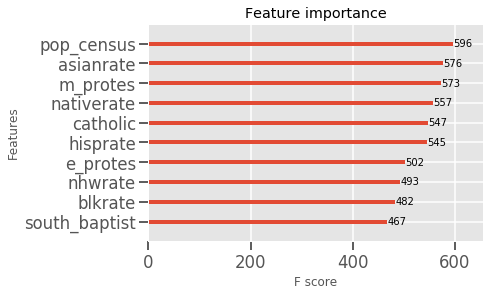

In [20]:
plt.figure(figsize=(12,14))
xgb.plot_importance(xgb_opt,max_num_features=10)

These feature importances are fake news because of multicollinearity issues (religiosity is collinear with the religion variables, for example), so we turn to SHAP to see what features drive this model.

[SHAP](https://arxiv.org/pdf/1705.07874.pdf) produces a score for each pair of (feature,sample), indicating how much that feature contributed in that particular case. In effect SHAP is solving a credit assignment problem.

Unlike with the coefficients in OLS, here we have scores per pair of features, which make it more important to visualise what is going on on a case by case basis to see if trends emerge

In [21]:
import shap
shap.initjs()

In [22]:
explainer=shap.TreeExplainer(xgb_opt)
shaps=explainer.shap_values(X)

In [23]:
#Model prediction: What happens if

'Position is 2778'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.137,0.134068,0.123796,0.150767,0.139392,0.148993


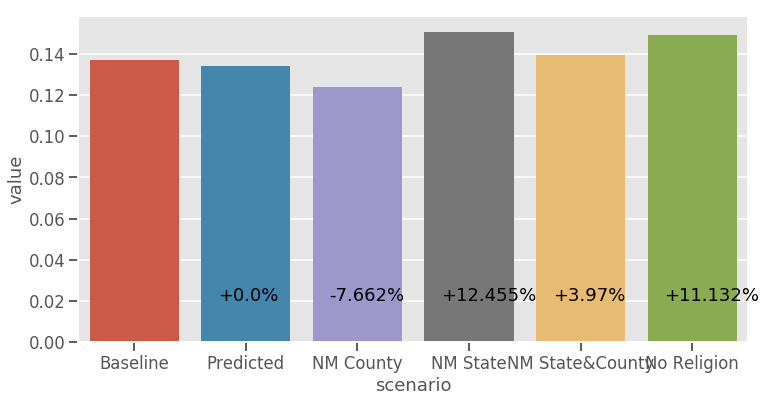

In [24]:
def plot_mormon_change(county, state):
    sns.set_context("talk")
    plt.figure(figsize=(12, 6))
    data_salt = data.query("county==@county and state==@state")
    salt = X.iloc[data_salt.index[0]].to_frame().T
    display(f'Position is {data_salt.index[0]}')
    baseline = data_salt.pov_saipe_2010.values[0]
    predicted = xgb_opt.predict(salt)
    # No mormons
    nomormons = salt.assign(mormon=0)
    # No mormons in the state
    nostatemormon = salt.assign(state_mormon=0)
    # Both
    both = salt.assign(mormon=0, state_mormon=0)
    # No religion
    noreligion= salt.assign(
        mormon=0,
        state_mormon=0,
        muslim=0,
        catholic=0,
        e_protes=0,
        b_protes=0,
        m_protes=0,
        south_baptist=0,
        o_jew=0,
    )
    predicted_nomorm = xgb_opt.predict(nomormons)
    predicted_both = xgb_opt.predict(both)
    predicted_nostatemormon = xgb_opt.predict(nostatemormon)
    predicted_norel = xgb_opt.predict(noreligion)
    k = pd.DataFrame(
        {
            "Baseline": baseline,
            "Predicted": predicted,
            "NM County": predicted_nomorm,
            "NM State": predicted_nostatemormon,
            "NM State&County": predicted_both,
            "No Religion": predicted_norel,
        }
    )
    display(k)
    sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))

    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 3
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))


plot_mormon_change("Salt Lake", "Utah")

'Position is 217'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.128,0.118299,0.116171,0.113711,0.113073,0.116068


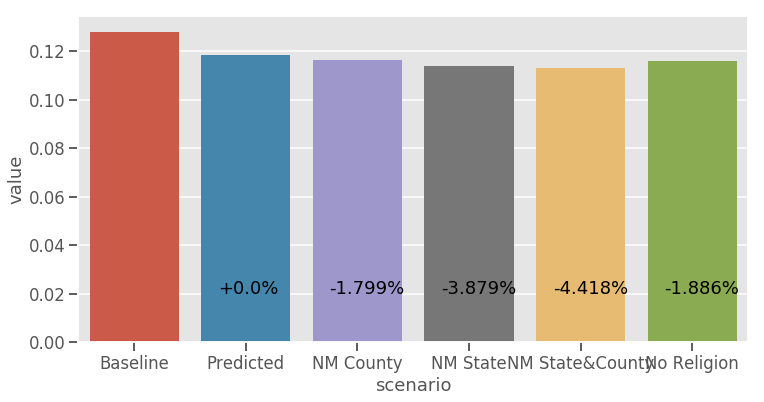

In [25]:
plot_mormon_change('San Francisco',"California")

In [26]:
#Salt Lake City
shap.force_plot(explainer.expected_value,shaps[2778,:],X.iloc[2778,:])

In [27]:
#San Francisco
shap.force_plot(explainer.expected_value,shaps[217,:],X.iloc[217,:])

In [183]:
data.sort_values('povrate')

,state,county,povrate,pop_census,income_census,nhwrate,blkrate,asianrate,nativerate,hisprate,...,religiosity,pov_saipe_2010,pov_saipe_2017,mortality_alcohol,mortality_drug_us,mortality_self_ha,mortality_interpe,mortality,outcomes,state_mormon
2641,Texas,King,0.000000,5.389072,10.584334,0.817352,0.000000,0.036530,0.000000,0.100457,...,0.898601,0.125,0.139,1.39,3.72,11.69,1.82,0.053739,0.063901,0.011772
2657,Texas,Loving,0.000000,3.713572,10.650649,0.780488,0.000000,0.000000,0.219512,0.000000,...,0.073171,0.145,0.097,2.46,8.23,18.01,3.29,0.140031,0.146405,0.011772
2775,Utah,Morgan,0.010727,9.099297,10.097243,0.963164,0.000000,0.003218,0.000777,0.021414,...,0.896293,0.054,0.041,3.10,7.49,16.08,1.83,0.121104,0.088374,0.689507
2624,Texas,Irion,0.014943,7.422374,10.369012,0.738793,0.041841,0.002989,0.000000,0.216378,...,0.756098,0.096,0.093,1.24,5.38,13.41,2.39,0.075169,0.070492,0.011772
1797,New Mexico,Los Alamos,0.024253,9.796848,10.809203,0.773202,0.003317,0.053839,0.001603,0.141894,...,0.673705,0.032,0.037,3.29,7.64,15.15,2.56,0.122856,0.082199,0.034348
256,Colorado,Douglas,0.028557,12.514395,10.655328,0.856451,0.011286,0.036055,0.001920,0.072747,...,0.350369,0.035,0.032,1.55,4.40,13.25,1.74,0.068727,0.036921,0.028355
2856,Virginia,Loudoun,0.031515,12.577384,10.722298,0.643189,0.069675,0.139868,0.001018,0.117074,...,0.383659,0.037,0.030,1.22,2.32,9.37,1.52,0.027551,0.003835,0.011166
258,Colorado,Elbert,0.034949,10.029680,10.456855,0.907670,0.007485,0.006428,0.006560,0.054905,...,0.150178,0.065,0.049,1.99,5.70,17.98,1.99,0.113519,0.086227,0.028355
1780,New Jersey,Somerset,0.035510,12.664740,10.759327,0.644024,0.083408,0.133294,0.000683,0.122826,...,0.485200,0.052,0.053,2.20,5.51,6.90,1.95,0.040335,0.023628,0.003594
265,Colorado,Hinsdale,0.036810,6.192362,10.675746,0.924335,0.000000,0.000000,0.000000,0.073620,...,0.332147,0.094,0.086,2.41,3.47,18.61,2.35,0.114899,0.099356,0.028355


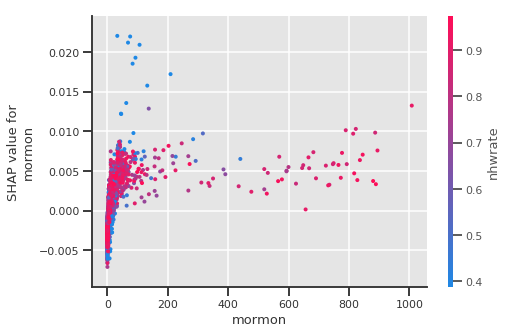

In [28]:
shap.dependence_plot("mormon", shaps,X)

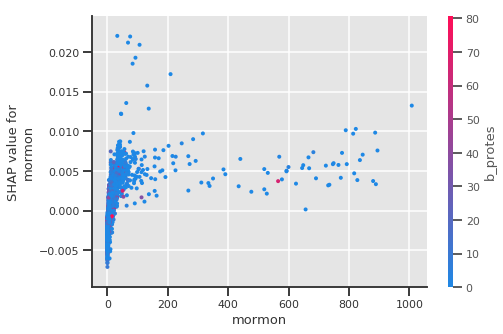

In [29]:
#All the mormons driving the correlation are in Mormon states
shap.dependence_plot("mormon", shaps,X,interaction_index=7)

In [51]:
#takes time
# interactions=explainer.shap_interaction_values(X)
# import pickle
# with open('clean_data/interactions.pkl','wb') as file:
#     pickle.dump(file=file,obj=interactions)

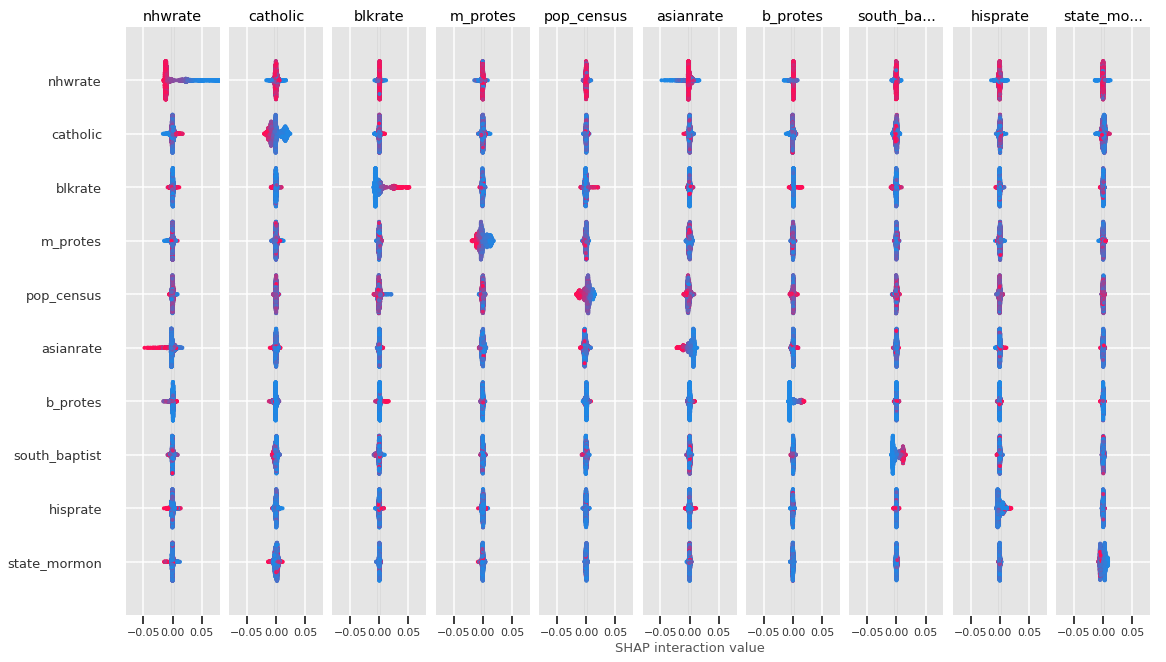

In [61]:
shap.summary_plot(interactions, X,max_display=10)

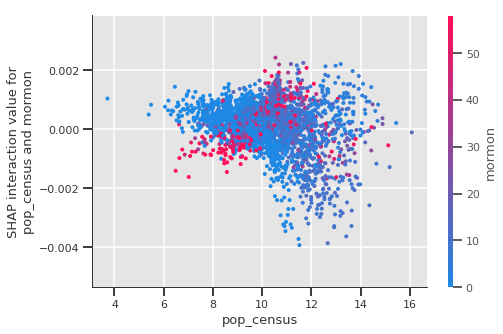

In [54]:
shap.dependence_plot(
    ("pop_census", "mormon"),
    interactions, X,
    display_features=X
)

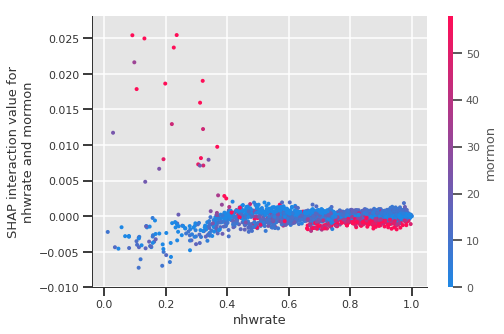

In [56]:
shap.dependence_plot(
    ("nhwrate", "mormon"),
    interactions, X,
    display_features=X
)

In [68]:
X

,mormon,pop_census,nhwrate,blkrate,nativerate,asianrate,state_mormon,b_protes,catholic,e_protes,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,15.028889,10.880121,0.775524,0.178215,0.002897,0.006547,0.007176,41.978889,32.358889,503.990000,...,0,0,0,0,0,0,0,0,0,0
1,5.610000,12.065407,0.840777,0.093793,0.006064,0.006536,0.007176,17.170000,76.858889,318.138889,...,0,0,0,0,0,0,0,0,0,0
2,9.650000,10.118962,0.472111,0.464674,0.003141,0.001661,0.007176,121.208889,20.940000,320.250000,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,10.016414,0.836090,0.152587,0.001769,0.001592,0.007176,42.158889,0.000000,443.328889,...,0,0,0,0,0,0,0,0,0,0
4,5.080000,10.936049,0.894959,0.011554,0.003845,0.004339,0.007176,1.010000,82.760000,509.800000,...,0,0,0,0,0,0,0,0,0,0
5,0.000000,9.273033,0.221368,0.741646,0.002197,0.004303,0.007176,315.648889,4.490000,197.180000,...,0,0,0,0,0,0,0,0,0,0
6,4.870000,9.930422,0.547260,0.429241,0.001340,0.008423,0.007176,79.098889,3.680000,413.088889,...,0,0,0,0,0,0,0,0,0,0
7,9.688889,11.644822,0.742610,0.202187,0.004379,0.006633,0.007176,43.538889,26.920000,569.808889,...,0,0,0,0,0,0,0,0,0,0
8,6.928889,10.444619,0.582377,0.391191,0.000492,0.004193,0.007176,168.930000,7.280000,377.120000,...,0,0,0,0,0,0,0,0,0,0
9,0.000000,10.137096,0.921245,0.046770,0.007704,0.002685,0.007176,0.000000,0.000000,418.060000,...,0,0,0,0,0,0,0,0,0,0


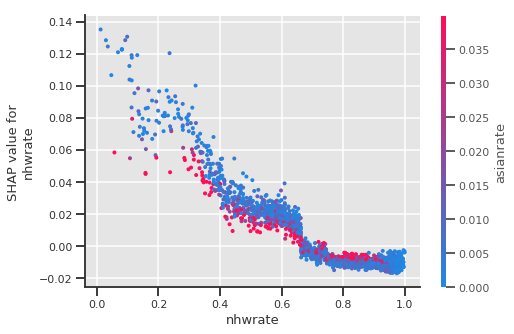

In [31]:
shap.dependence_plot("nhwrate", shaps, X)

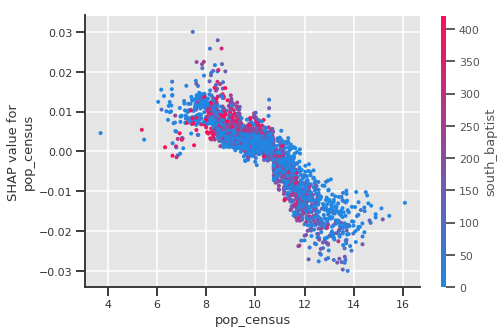

In [32]:
shap.dependence_plot("pop_census", shaps, X)

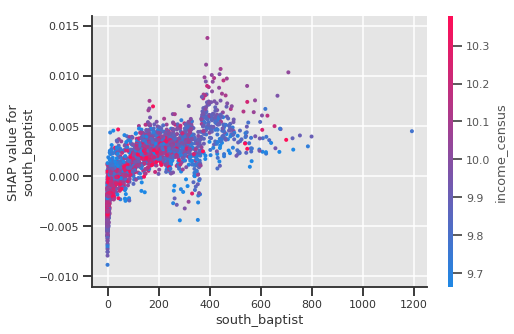

In [190]:
shap.dependence_plot("south_baptist", shaps, X)

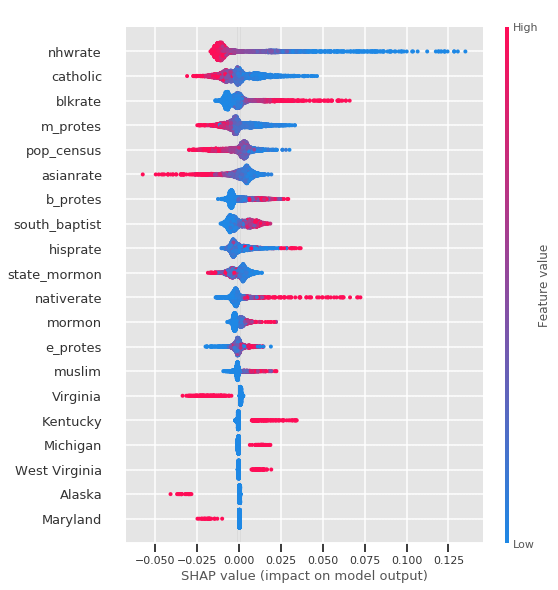

In [33]:
# This plot measures the impact of a variable on poverty. Each point is a particular county.
# The y-size of each row represents the density of points at that particular point
# High SHAP values mean in that case the variable in that case contributed to a higher poverty rate
# The sense in which it contributed can be glanced from the colorbar
# For example, the blue points in income_census mean that when income was low, the SHAP value was high (higher poverty)
# Positive values mean that in that part
shap.summary_plot(shaps,X)

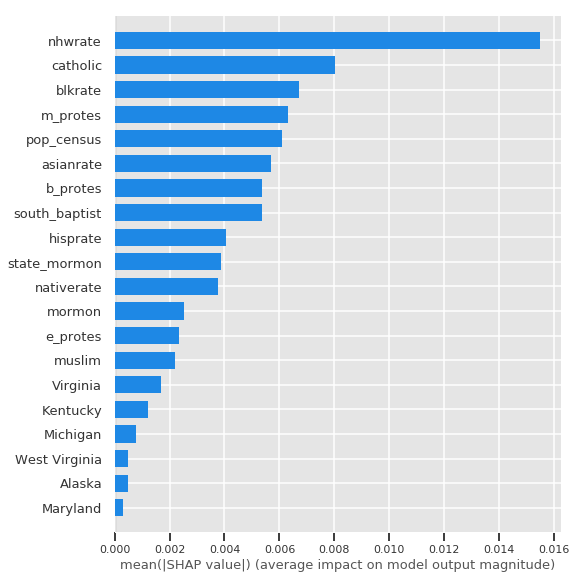

In [71]:
shap.summary_plot(shaps, X, plot_type="bar")

In [72]:
# Nearest neightbours to Salt Lake City
data_salt = data.query('county=="Salt Lake"')
salt = data_salt.index[0]


def normal(col):
    return (col - col.mean()) / col.std()


normalized = data.loc[
    :,
    [
        i
        for i in data.columns
        if (data[i].dtype == float)
        #To avoid double counting
        # We ignore mormon to deliberately pull non-mormon examples

        and i not in ["state_mormon", "mormon", "religiosity","pop2010","outcomes"]
    ],
].apply(normal)
from sklearn.neighbors import NearestNeighbors

neig = NearestNeighbors()
neig.fit(normalized)
data.iloc[
    neig.kneighbors(normalized.loc[salt, :].values.reshape(1, -1), 10)[1].squeeze(), :
][
    [
        "state",
        "county",
        "povrate",
        "pov_saipe_2010",

        "mormon",
        "state_mormon",
        "mortality_alcohol",
        "mortality_interpe",
        "mortality_self_ha",
        "mortality_drug_us",
        "mortality",
        "outcomes",
        "pop2010",
        "b_protes",
        "catholic",
        "e_protes",
        "m_protes",
        "south_baptist",
        "o_jew",
        "muslim",
    ]
]

,state,county,povrate,pov_saipe_2010,mormon,state_mormon,mortality_alcohol,mortality_interpe,mortality_self_ha,mortality_drug_us,mortality,outcomes,pop2010,b_protes,catholic,e_protes,m_protes,south_baptist,o_jew,muslim
2778,Utah,Salt Lake,0.102685,0.137,593.250000,0.689507,5.47,3.67,25.39,9.98,0.236136,0.220286,1029655.0,1.260000,81.908889,26.710000,12.420000,4.888889,0.10,4.41
2789,Utah,Weber,0.114729,0.137,599.600000,0.689507,4.43,3.33,27.59,11.27,0.242211,0.224776,231236.0,3.840000,81.878889,46.538889,11.938889,5.110000,0.00,0.43
259,Colorado,El Paso,0.110709,0.134,29.890000,0.028355,6.07,4.93,20.12,9.54,0.214503,0.205201,622263.0,4.320000,84.060000,153.120000,54.148889,26.050000,0.00,0.48
1750,Nevada,Washoe,0.125972,0.153,46.118889,0.064764,6.10,5.44,23.64,16.34,0.273583,0.265028,421407.0,2.440000,143.590000,77.260000,19.440000,10.820000,0.14,0.73
2209,Oregon,Jackson,0.139909,0.157,41.688889,0.038644,3.94,3.42,22.12,9.53,0.192165,0.193552,203206.0,0.000000,81.518889,127.408889,25.850000,5.460000,0.30,0.00
2203,Oregon,Deschutes,0.104874,0.148,32.798889,0.038644,4.75,2.77,20.38,7.69,0.177047,0.175259,157733.0,0.000000,73.810000,109.858889,31.198889,3.650000,0.00,0.00
300,Colorado,Weld,0.139326,0.143,19.030000,0.028355,6.21,4.10,17.73,10.06,0.196752,0.193601,252825.0,0.000000,135.030000,92.818889,38.798889,9.410000,0.00,1.22
2787,Utah,Washington,0.113457,0.147,681.980000,0.689507,2.28,2.84,25.86,8.66,0.189565,0.184830,138115.0,4.758889,42.320000,16.980000,9.348889,3.318889,0.00,0.00
2942,Washington,Clark,0.108599,0.127,48.880000,0.039668,4.02,2.90,16.76,9.33,0.152537,0.148411,425363.0,0.890000,63.210000,137.330000,29.698889,8.390000,0.14,0.72
2214,Oregon,Lane,0.166988,0.191,36.070000,0.038644,5.21,3.18,19.97,9.89,0.192786,0.208632,351715.0,0.840000,61.938889,96.810000,34.350000,9.210000,0.71,0.88


'Position is 2789'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.137,0.135237,0.124373,0.146737,0.136651,0.148792


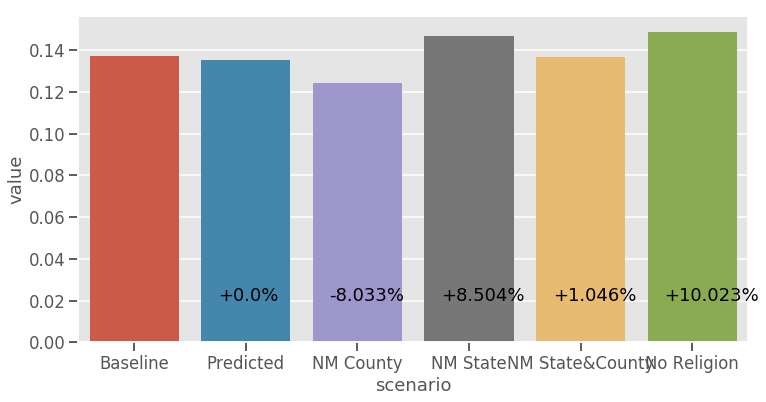

In [73]:
plot_mormon_change("Weber", "Utah")

'Position is 259'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.134,0.127223,0.127076,0.128386,0.126319,0.142039


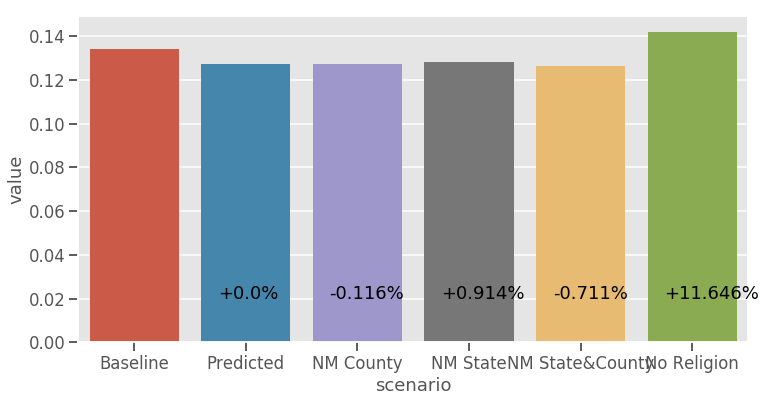

In [74]:
plot_mormon_change("El Paso", "Colorado")

,Baseline,min(0.01),x0.5,x0.95,Predicted,x1.05,x1.5,max(1.0)
0,0.137,0.237518,0.197099,0.139503,0.134068,0.13215,0.127772,0.127772


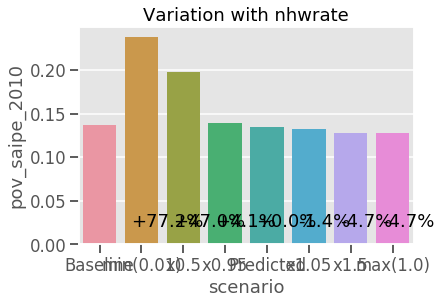

In [75]:
def plot_variable_change(county, state, variable, ax=None):
    data_salt = data.query("county==@county and state==@state")
    salt = X.iloc[data_salt.index[0]].to_frame().T
    # display(f'Position is {data_salt.index[0]}')
    baseline = data_salt.pov_saipe_2010.values[0]
    predicted = xgb_opt.predict(salt)
    baseline_var = data_salt[variable].values[0]

    varmin = data[variable].min()
    varmax = data[variable].max()
    income_multiples = {
        f"min({round(varmin,2)})": varmin / baseline_var,
        "x0.5": 0.5,
        "x0.95": 0.95,
        "Predicted": 1.0,
        "x1.05": 1.05,
        "x1.5": 1.5,
        f"max({round(varmax,2)})": varmax / baseline_var,
    }
    scenarios = {}

    def multiplier_exp(df, variable, i):
        if variable in ["income_census", "pop_census"]:
            return np.log(np.exp(df[variable]) * i)
        else:
            return df[variable] * i

    for name, i in income_multiples.items():
        replacements = {variable: multiplier_exp(salt, variable, i)}
        new_var = multiplier_exp(salt, variable, i)
        original_var = baseline_var
        diff = new_var - original_var
        if variable == "nhwrate":
            # Reduce the coefficients of other races (blkrate,nativerate,asianrate)
            replacements["blkrate"] = np.clip(salt.blkrate - diff, a_min=0, a_max=1)
        elif variable == "blkrate":
            replacements["nhwrate"] = np.clip(salt.nhwrate - diff, a_min=0, a_max=1)

        scenarios[name] = xgb_opt.predict(salt.assign(**replacements))

    k = pd.DataFrame(scenarios)
    k.insert(0, "Baseline", baseline)

    display(k)
    if ax is not None:
        sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))
    else:
        sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"), ax=ax)

    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 1
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))
    plt.title(f"Variation with {variable}")
    plt.ylabel("pov_saipe_2010")


plot_variable_change("Salt Lake", "Utah", "nhwrate")

,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(1007.86)
0,0.137,0.123796,0.134068,0.134068,0.134068,0.134068,0.135838,0.135838


,Baseline,min(0.01),x0.5,x0.95,Predicted,x1.05,x1.5,max(1.0)
0,0.137,0.237518,0.197099,0.139503,0.134068,0.13215,0.127772,0.127772


,Baseline,min(3.71),x0.5,x0.95,Predicted,x1.05,x1.5,max(16.08)
0,0.137,0.134651,0.13468,0.134068,0.134068,0.134068,0.134068,0.134068


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(0.86)
0,0.137,0.13215,0.135819,0.134068,0.134068,0.134068,0.13494,0.237518


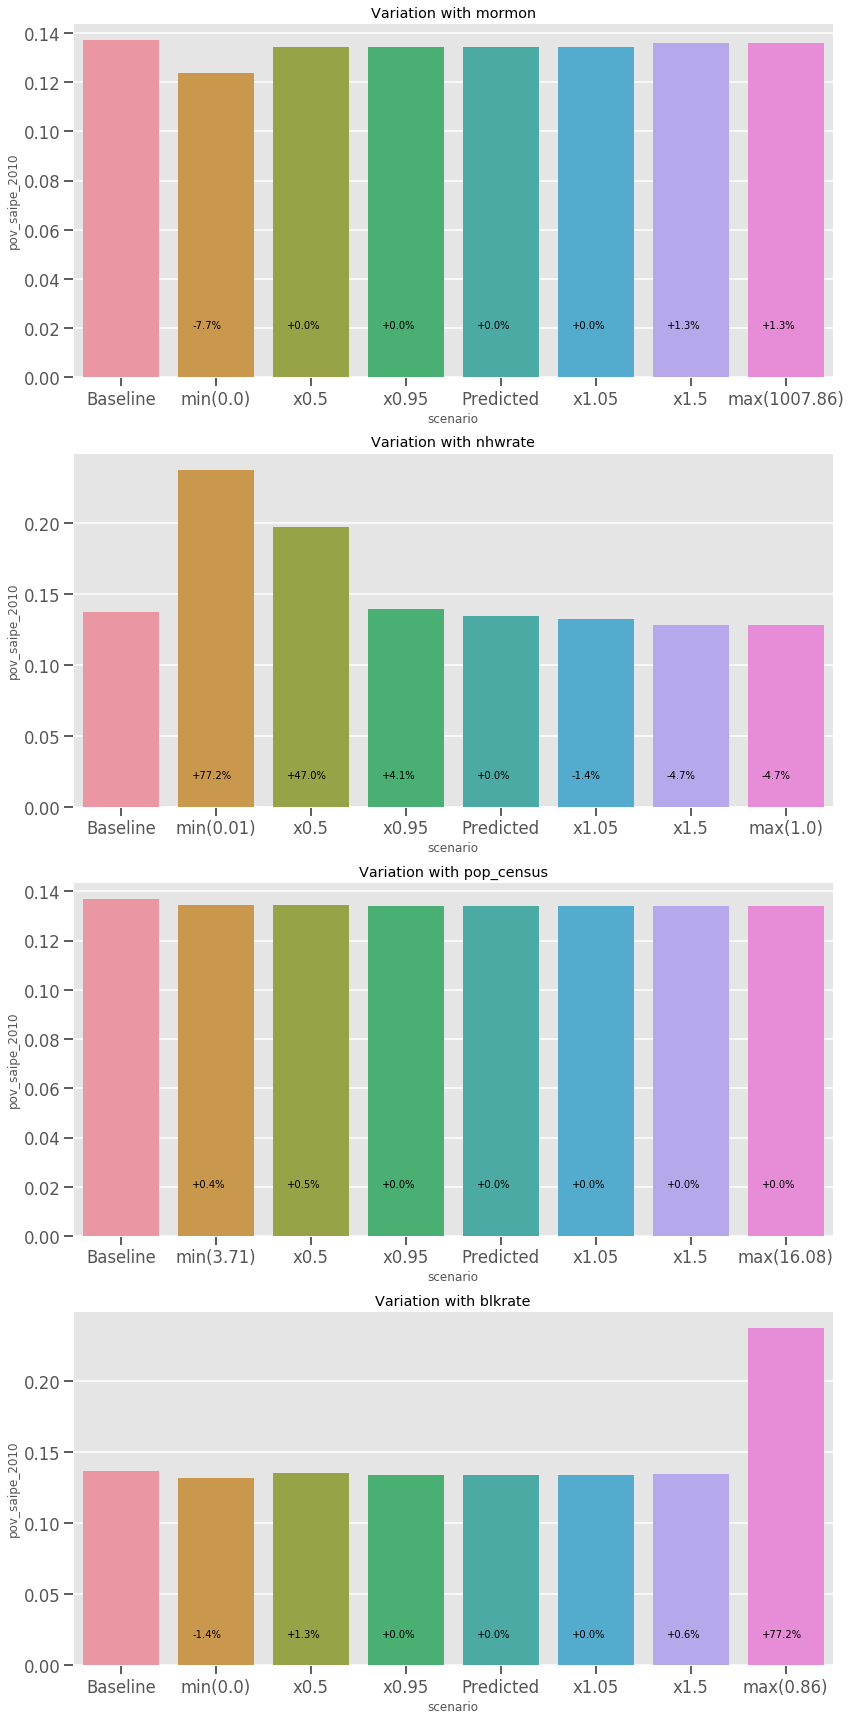

In [76]:
cols=['mormon','nhwrate','pop_census','blkrate']
sns.set_context("talk")
plt.figure(figsize=(12, 24))
plt.style.use("ggplot")
for pos,var in enumerate(cols):
    ax=plt.subplot(len(cols),1,pos+1)
    plot_variable_change('Salt Lake','Utah',var,ax=ax)
plt.tight_layout()

,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(1007.86)
0,0.128,0.116171,0.118999,0.118299,0.118299,0.11768,0.117335,0.12149


,Baseline,min(0.01),x0.5,x0.95,Predicted,x1.05,x1.5,max(1.0)
0,0.128,0.202289,0.18083,0.123265,0.118299,0.117534,0.105262,0.113027


,Baseline,min(3.71),x0.5,x0.95,Predicted,x1.05,x1.5,max(16.08)
0,0.128,0.13035,0.119111,0.118299,0.118299,0.118299,0.119103,0.118299


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(0.86)
0,0.128,0.115362,0.115619,0.118299,0.118299,0.118079,0.123265,0.215964


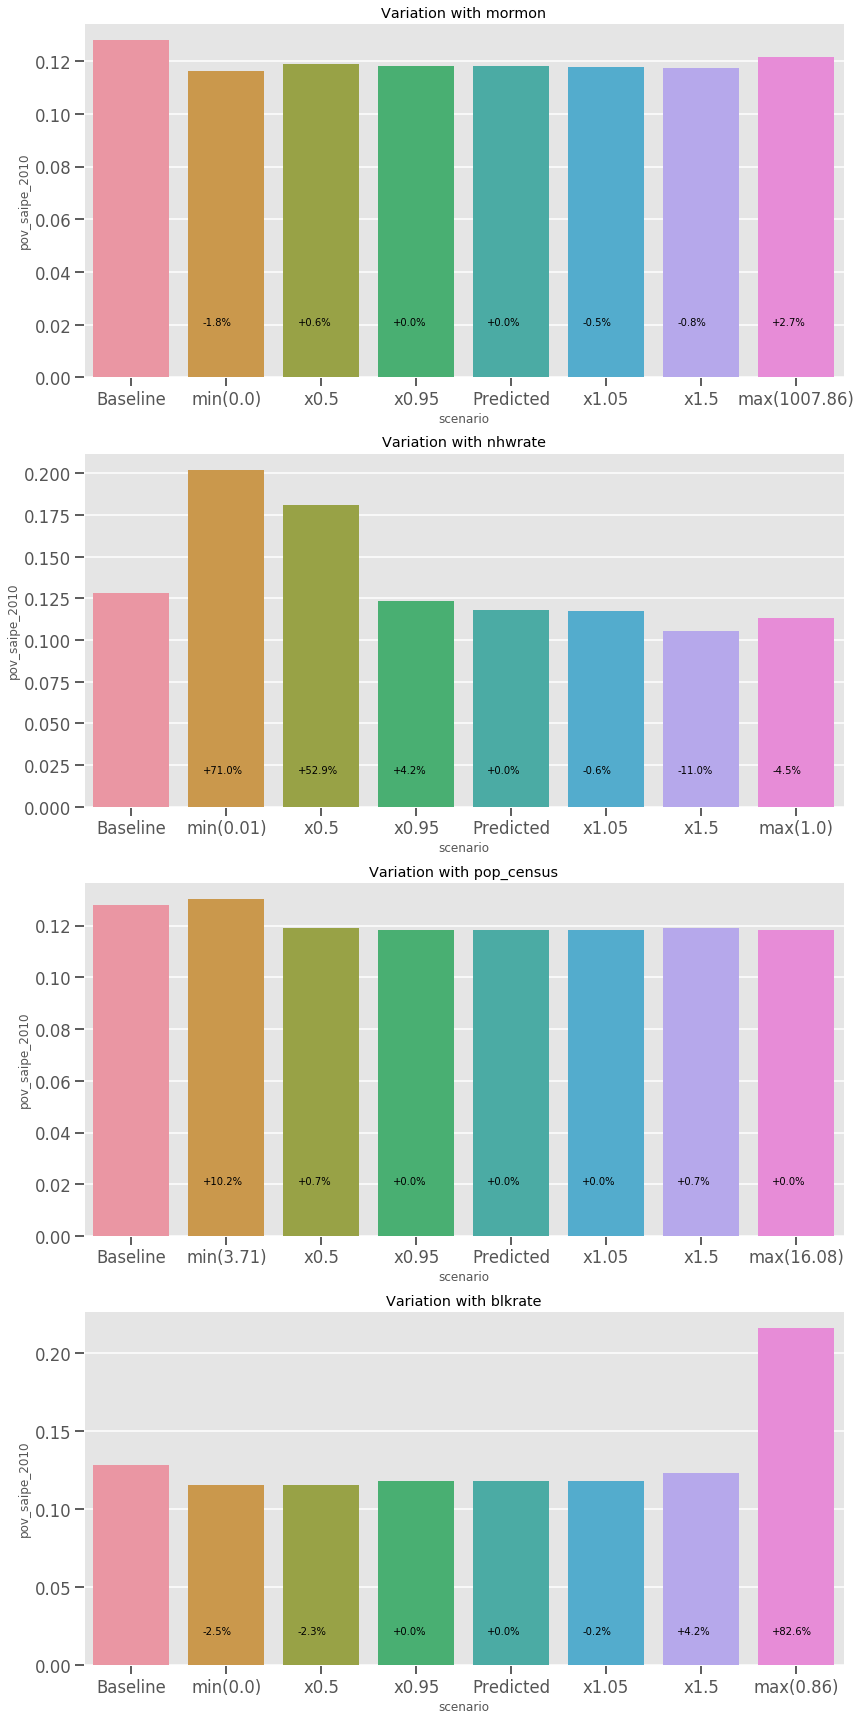

In [77]:
cols=['mormon','nhwrate','pop_census','blkrate']
sns.set_context("talk")
plt.figure(figsize=(12, 24))
plt.style.use("ggplot")
for pos,var in enumerate(cols):
    ax=plt.subplot(len(cols),1,pos+1)
    plot_variable_change('San Francisco','California',var,ax=ax)
plt.tight_layout()